# **Notas**

Librerías:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Dataset**

In [2]:
df_notas = pd.read_excel('./Notas_data/Notas.xlsx')
df_notas


,NOTAS,NOTAS ORDENADAS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,VALOR,MEDIA,DESVIACIÓN,DESVIACIÓN AL CUADRADO
0,3.0,3.0,CANTIDAD DE OBSERVACIONES:,16.000,NaN,NaN,3.0,11.875,-8.875,78.765625
1,19.0,8.0,MIN.,3.000,NaN,NaN,19.0,11.875,7.125,50.765625
2,10.0,9.0,MAX.,19.000,NaN,NaN,10.0,11.875,-1.875,3.515625
3,15.0,10.0,RANGO,16.000,NaN,NaN,15.0,11.875,3.125,9.765625
4,14.0,11.0,SUMA DE LAS NOTAS,190.000,NaN,NaN,14.0,11.875,2.125,4.515625
5,12.0,11.0,MEDIA,11.875,NaN,NaN,12.0,11.875,0.125,0.015625
6,9.0,11.0,MEDIANA,12.000,NaN,NaN,9.0,11.875,-2.875,8.265625
7,8.0,12.0,MODA,11.000,NaN,NaN,8.0,11.875,-3.875,15.015625
8,11.0,12.0,VARIANZA,13.050,NaN,NaN,11.0,11.875,-0.875,0.765625
9,12.0,12.0,CUARTIL_1,10.750,NaN,NaN,12.0,11.875,0.125,0.015625


In [3]:
columnas_drop = ['NOTAS ORDENADAS', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'VALOR', 'MEDIA', 'DESVIACIÓN', 'DESVIACIÓN AL CUADRADO']
#  Limpiamos el dataset, por ahora la columna que nos interesa es 'NOTAS'
df_notas = df_notas.drop(columnas_drop, axis=1)
#  Limpiamos los valores nulos de la columna 'NOTAS'
df_notas2 = df_notas.dropna()

In [4]:
df_notas2

,NOTAS
0,3.0
1,19.0
2,10.0
3,15.0
4,14.0
5,12.0
6,9.0
7,8.0
8,11.0
9,12.0


# **Cálculo de medidas para centralizar los datos**

Media , moda y mediana:

In [5]:
media=df_notas["NOTAS"].mean()
mediana=df_notas["NOTAS"].median()
moda = df_notas["NOTAS"].mode().values[0]

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
    


Media: 11.875
Mediana: 12.0
Moda: 11.0


Varianza y desviación típica:

In [6]:
# para ello vamos a crear un nuevo dataset con dos columnas más 

notas_menos_media = [nota - media for nota in df_notas2['NOTAS']]
notas_menos_media_cuadrado = [(nota - media)**2 for nota in df_notas2['NOTAS']]

df_notas_3 = pd.DataFrame({'Notas': df_notas2['NOTAS'], 'Notas - Media': notas_menos_media, 'Notas - Media^2': notas_menos_media_cuadrado})

df_notas_3


,Notas,Notas - Media,Notas - Media^2
0,3.0,-8.875,78.765625
1,19.0,7.125,50.765625
2,10.0,-1.875,3.515625
3,15.0,3.125,9.765625
4,14.0,2.125,4.515625
5,12.0,0.125,0.015625
6,9.0,-2.875,8.265625
7,8.0,-3.875,15.015625
8,11.0,-0.875,0.765625
9,12.0,0.125,0.015625


In [7]:
#calulamos la varianza
varianza = np.sum(df_notas_3["Notas - Media^2"])/len(df_notas2['NOTAS'])
print("Varianza :" + str(varianza))
desviacion_tip=np.sqrt(varianza)
print("Desviación tipica :" +str(desviacion_tip))


Varianza :12.234375
Desviación tipica :3.4977671449083054


Cuartiles:

In [8]:
Q1=df_notas2["NOTAS"].quantile(0.25)
Q2=df_notas2["NOTAS"].quantile(0.5)
Q3 = df_notas2['NOTAS'].quantile(0.75)
Rango_inter=Q1-Q2
print(f"Q1: {Q1}")
print(f"Q2 (Mediana): {Q2}")
print(f"Q3: {Q3}")

Q1: 10.75
Q2 (Mediana): 12.0
Q3: 14.0


Box plot:

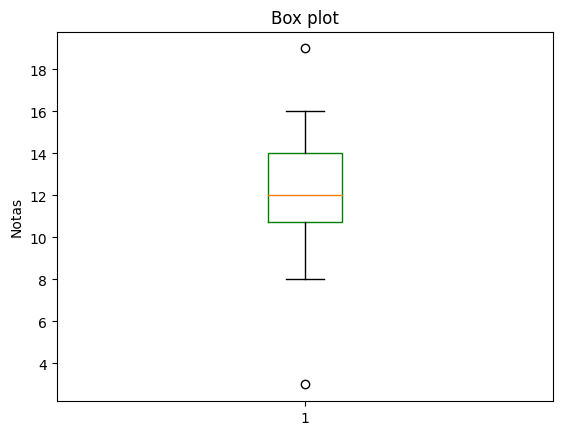

In [9]:
#diagrama boxplot
fig, ax = plt.subplots()

ax.boxplot(df_notas2['NOTAS'])

ax.set_title('Box plot')
ax.set_ylabel('Notas')


# Agregar rayas para la mediana, el primer y tercer cuartil, y los valores mínimo y máximo
mediana = ax.lines[4]
cuartil1 = ax.lines[1]
cuartil3 = ax.lines[2]
minimo = ax.lines[0]
maximo = ax.lines[3]

mediana.set_color('black')
cuartil1.set_color('black')
cuartil3.set_color('black')


minimo.set_color('green')
minimo.set_linestyle('-')
maximo.set_color('black')
maximo.set_linestyle('-')

plt.show()

plt.show()

En el box plot podemos indetificar tanto los cuartiles como los datos más dispersos:

In [10]:
#dato más dispersos que podemos observar en el gráfico
min=np.min(df_notas2['NOTAS'])
maz=np.max(df_notas2['NOTAS'])
print("El dato min:")
print(min)
print("El dato máx")
print(maz)

El dato min:
3.0
El dato máx
19.0


# **Histogramas**

### Diagrama de barras:

### Gráfico de lineas:

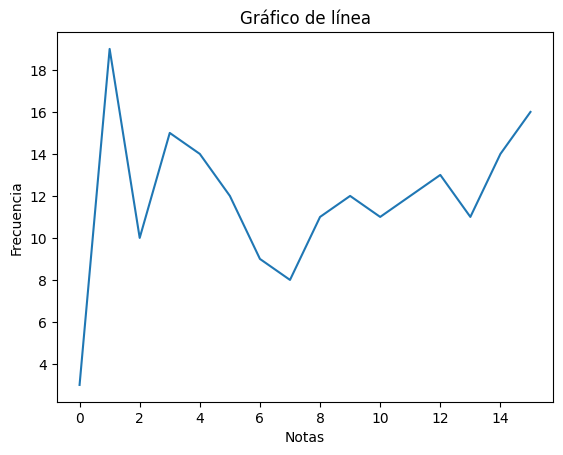

In [11]:
# Hacemos un grafido de linea de las notas
fig, ax = plt.subplots()

ax.plot(df_notas2['NOTAS'])

ax.set_title('Gráfico de línea')
ax.set_xlabel('Notas')
ax.set_ylabel('Frecuencia')
plt.show()

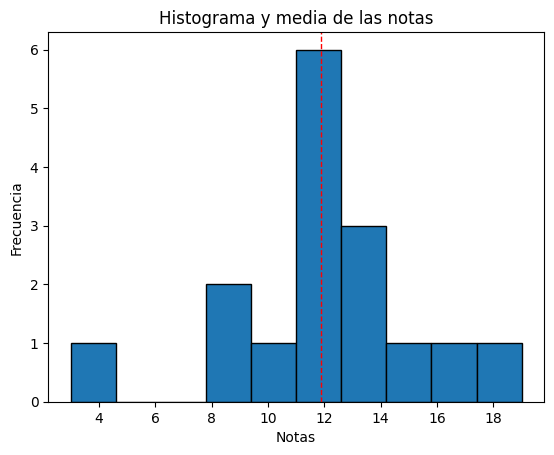

In [12]:
#  Dibujamos el histograma con la linea de la media
plt.hist(df_notas2['NOTAS'], bins=10, edgecolor='black')
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Notas')
plt.ylabel('Frecuencia')
plt.title('Histograma y media de las notas')
plt.show()

In [13]:
#  Calculamos la mediana de las notas 
mediana = df_notas2['NOTAS'].median()
print(f"Mediana: {mediana}")

Mediana: 12.0


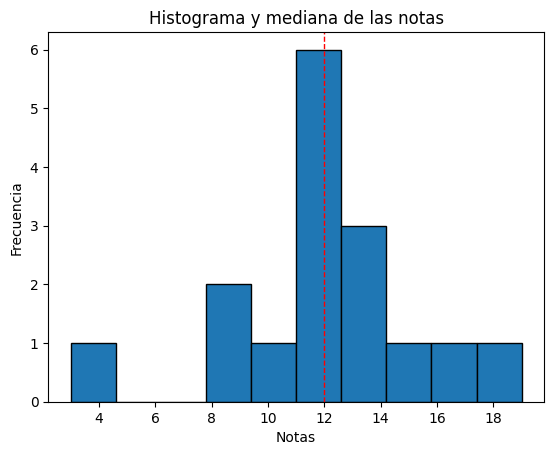

In [14]:
#  Dibujamos el histograma con la linea de la mediana
plt.hist(df_notas2['NOTAS'], bins=10, edgecolor='black')
plt.axvline(mediana, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Notas')
plt.ylabel('Frecuencia')
plt.title('Histograma y mediana de las notas')
plt.show()

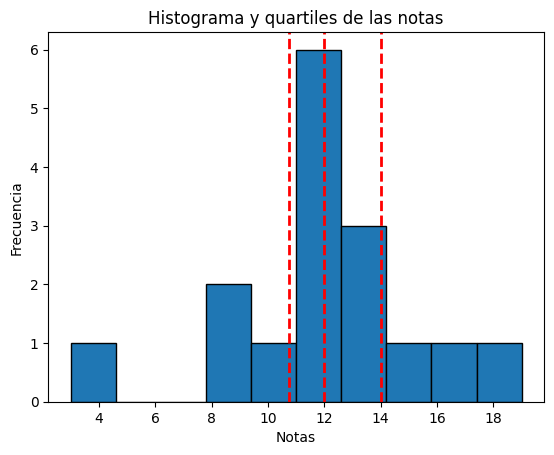

In [15]:
#  Dibujamos el histograma con los cuartiles de las notas y un cuadro que indique el valor de los cuartiles 
plt.hist(df_notas2['NOTAS'], bins=10, edgecolor='black')
plt.xlabel('Notas')
plt.ylabel('Frecuencia')
plt.title('Histograma y quartiles de las notas')
plt.axvline(Q1, color='red', linestyle='dashed', linewidth=2)
plt.axvline(Q2, color='red', linestyle='dashed', linewidth=2)
plt.axvline(Q3, color='red', linestyle='dashed', linewidth=2)
plt.show()